<a href="https://colab.research.google.com/github/keyurshah710/Python-graphing-and-statistical-Analysis./blob/main/The_Medical_Costs_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Scenario: You are an analyst employed by a health care company. Your boss has asked you to produce a report that performs the following
# tasks and answers the following questions about medical insurance charges.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Section 1 Tasks and questions

# 1.Display the summary statistics for the age and charges columns. What do you notice about how the data is distributed?

df=pd.read_csv('/content/drive/MyDrive/Independent Study/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#2 How many people were sampled from each region?
region_counts = df['region'].value_counts()

print(region_counts)


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


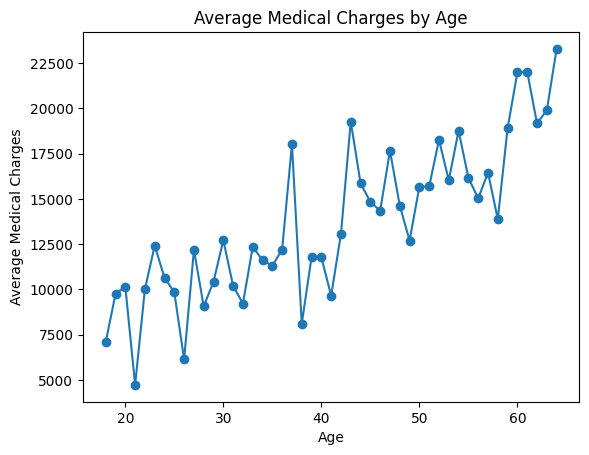

In [ ]:
#3 How are average medical charges related to age? Use a line plot to answer this question.
avg_charges_by_age = df.groupby('age')['charges'].mean()


plt.plot(avg_charges_by_age.index, avg_charges_by_age.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Average Medical Charges')
plt.title('Average Medical Charges by Age')
plt.grid(False)
plt.show()

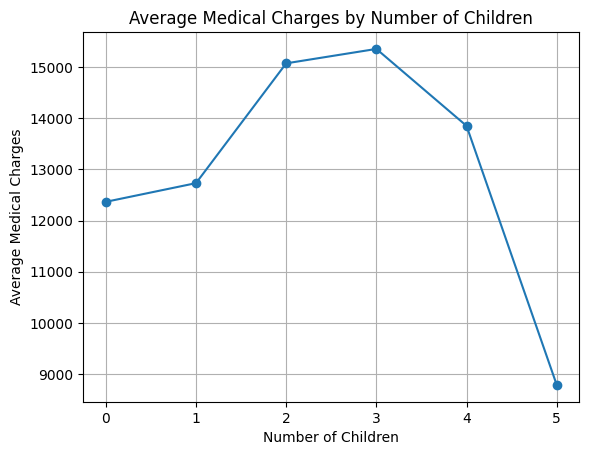

In [ ]:
# 4 How are average medical charges related to the number of children? Use a line plot to answer this question.
avg_charges_by_children = df.groupby('children')['charges'].mean()

plt.plot(avg_charges_by_children.index, avg_charges_by_children.values, marker='o')
plt.xlabel('Number of Children')
plt.ylabel('Average Medical Charges')
plt.title('Average Medical Charges by Number of Children')
plt.grid(True)
plt.show()

In [ ]:
#The Medical Costs case study: Section 2
#Scenario: Your boss liked your previous report so much that he wants you to expand on it by completing
#the following tasks and answering the following questions.



In [ ]:
#Section 2 Tasks and questions
#1.Display the column names and data types.
print(df.columns)
print(df.dtypes)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
#2 Display a count of unique values for each column.
unique_counts = df.nunique()
print(unique_counts)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [ ]:
#3.Check for missing values and drop their rows if any are found.


missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)
df.dropna(inplace=True)

missing_values_after_drop = df.isnull().sum()
print("\nMissing Values after dropping rows:")
print(missing_values_after_drop)



Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing Values after dropping rows:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


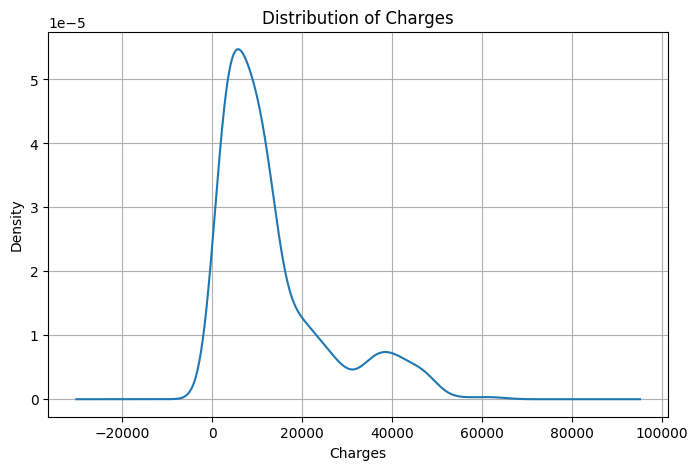

In [ ]:
#4. How are charges distributed? Use a density plot for your answer.
plt.figure(figsize=(8, 5))
df['charges'].plot(kind='density')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Distribution of Charges')
plt.grid(True)
plt.show()

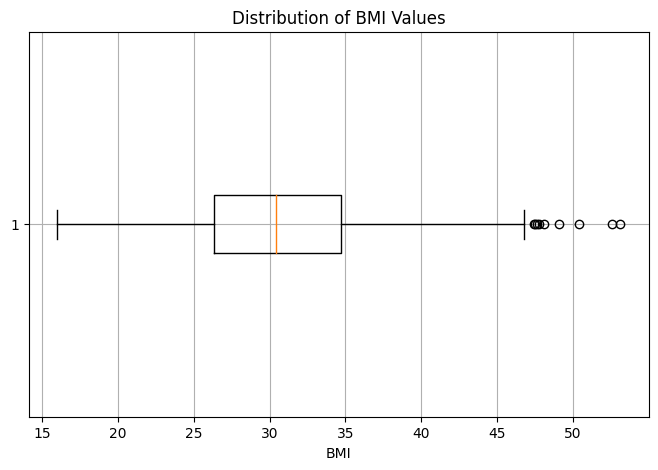

Outliers:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [ ]:
#5.How are the BMI values distributed? Are there any outliers?
plt.figure(figsize=(8, 5))
plt.boxplot(df['bmi'], vert=False)
plt.xlabel('BMI')
plt.title('Distribution of BMI Values')
plt.grid(True)
plt.show()


q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print("Outliers:")
print(outliers)

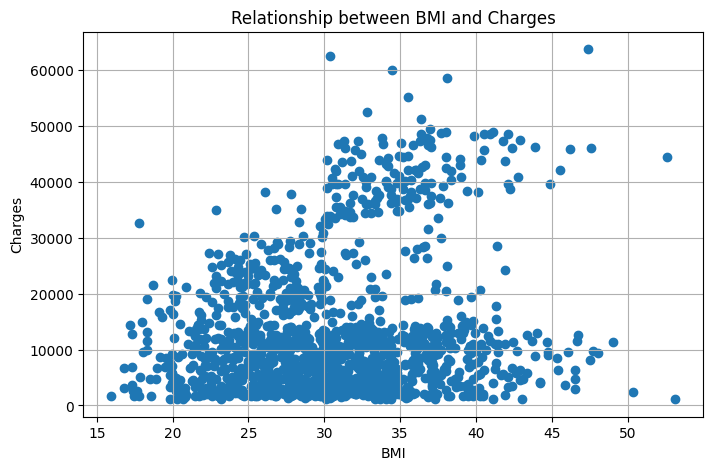

In [ ]:
# 6. What’s the relationship between BMI and charges?
plt.figure(figsize=(8, 5))
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')
plt.grid(True)
plt.show()
#Each point on the plot represents an individual's BMI value and corresponding charges.
#The x-axis represents BMI, and the y-axis represents charges.

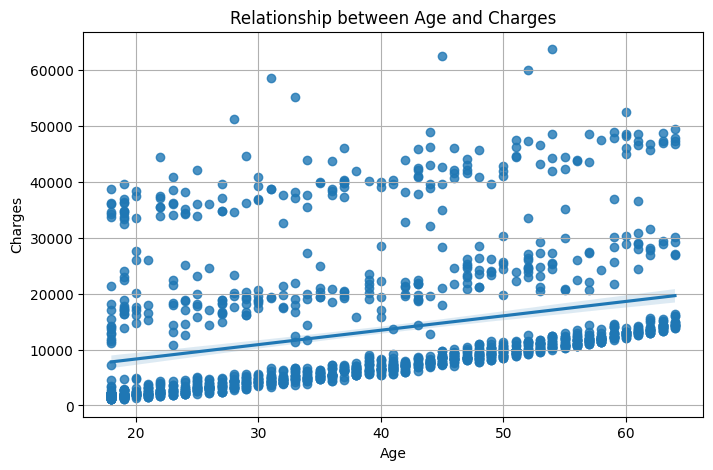

In [ ]:
# 7.What’s the relationship between age and charges?
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='age', y='charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.grid(True)
plt.show()
#The regression line represents the estimated relationship between age and charges.

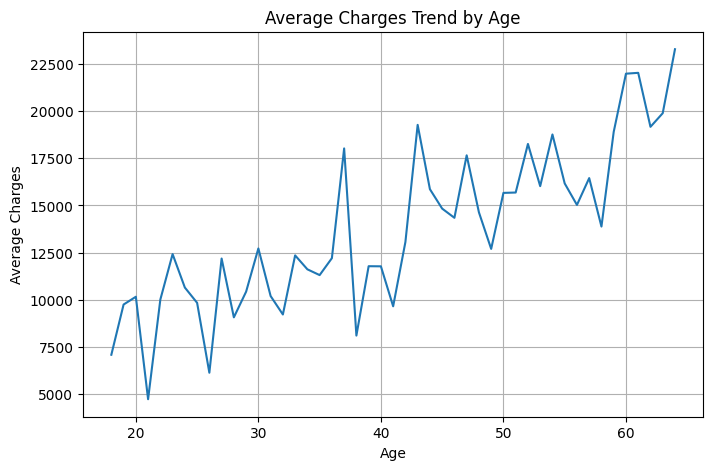

In [ ]:
#8. How do average charges trend as a person gets older?
average_charges_by_age = df.groupby('age')['charges'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(average_charges_by_age['age'], average_charges_by_age['charges'])
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges Trend by Age')
plt.grid(True)
plt.show()

In [ ]:
 #9.Create a new bmi_level column so it labels each person as low (<18.5), middle (18.5-25), high (25-30), or very high (>30). Note: Experts no longer consider BMI a useful measurement of health, but it is still used by insurance companies and thus is relevant to this analysis.
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['low', 'middle', 'high', 'very high']

df['bmi_level'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)
print(df.head())


   age     sex     bmi  children smoker     region      charges  bmi_level
0   19  female  27.900         0    yes  southwest  16884.92400       high
1   18    male  33.770         1     no  southeast   1725.55230  very high
2   28    male  33.000         3     no  southeast   4449.46200  very high
3   33    male  22.705         0     no  northwest  21984.47061     middle
4   32    male  28.880         0     no  northwest   3866.85520       high


In [ ]:
#10 How many people with low BMIs are in each region?
low_bmi_counts = df[df['bmi_level'] == 'low'].groupby('region')['region'].count()
print(low_bmi_counts)


region
northeast    10
northwest     7
southwest     3
Name: region, dtype: int64


In [ ]:
#11 What are the average charges for each BMI bin?
average_charges_by_bmi = df.groupby('bmi_level')['charges'].mean()

print(average_charges_by_bmi)


bmi_level
low           8852.200585
middle       10409.337709
high         10987.509891
very high    15552.335469
Name: charges, dtype: float64


In [ ]:
#12 What are the average charges for each smoker status?
average_charges_by_smoker = df.groupby('smoker')['charges'].mean()

print(average_charges_by_smoker)


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [ ]:
#13What are the average charges for each region
average_charges_by_region = df.groupby('region')['charges'].mean()

print(average_charges_by_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [ ]:
#The Medical Costs case study: Section 3 (regression)
#Scenario: Once again, your boss wants you to expand on your previous report by completing
#the following tasks and answering the following questions.

In [ ]:
#Section 3 Tasks and questions

X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:", X_test.shape, y_test.shape)

Train dataset shape: (1070, 7) (1070,)
Test dataset shape: (268, 7) (268,)


In [ ]:
#2.Print the r-values that show how all numeric variables are correlated with the charges column.

correlation_matrix = df.select_dtypes(include='number').corr()


charges_correlation = correlation_matrix['charges']

print(charges_correlation)

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64


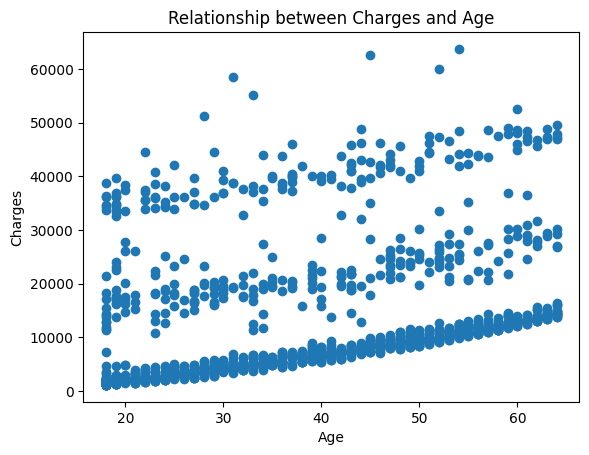

In [ ]:
#3. What’s the relationship between the charges and age columns? Use a scatterplot for your answer.
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Charges and Age')
plt.show()


In [ ]:
#4. Create a simple regression model for predicting charges by age.

X = df[['age']]
y = df['charges']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("Mean Squared Error:", mse)


Intercept: 3165.885006063021
Coefficient: 257.72261866689564
Mean Squared Error: 133440978.61376347


In [ ]:
#5. Use the model to predict the charges for the data in the testing data set.
y_pred = model.predict(X)

print("Predicted charges:")
print(y_pred)

Predicted charges:
[ 8062.61476073  7804.89214207 10382.11832874 ...  7804.89214207
  8578.05999807 18886.96474474]


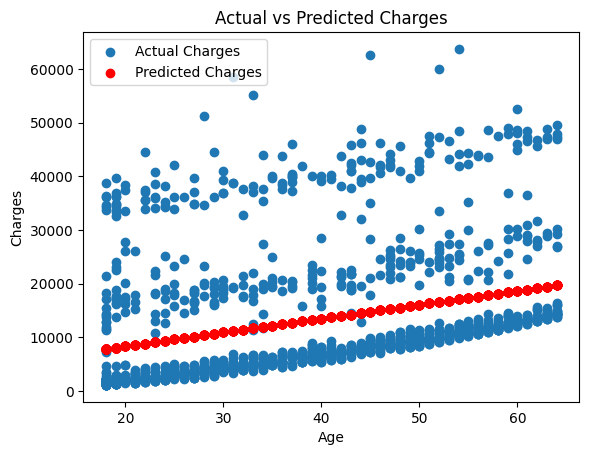

In [ ]:
#6. Plot the predicted charges for the testing data set along with the actual charges.


plt.scatter(X, y, label='Actual Charges')
plt.scatter(X, y_pred, color='red', label='Predicted Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()

In [ ]:
#7. Display the R2 value for the model.

r2 = model.score(X, y)
print("R-squared value:", r2)

R-squared value: 0.08940589967885804


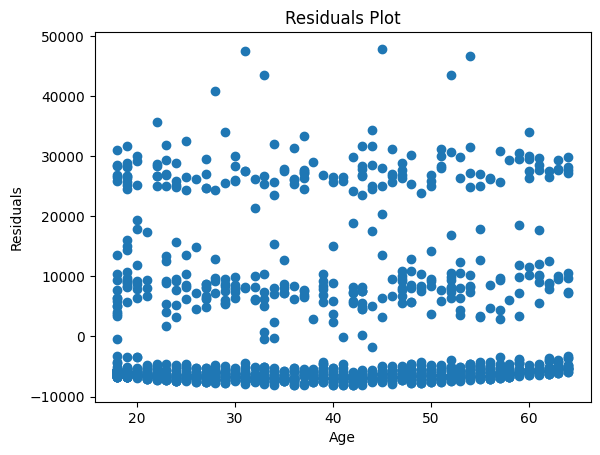

In [ ]:
#8. Calculate and plot the residuals.

residuals = y - y_pred
plt.scatter(X, residuals)
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

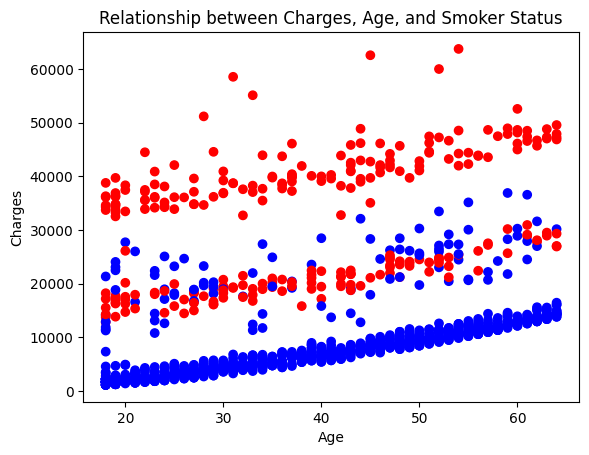

In [ ]:
#9.smoker_status_numeric = [0 if status == 'no' else 1 for status in smoker_status]

plt.scatter(df['age'], df['charges'], c=df['smoker'].map({'no': 'blue', 'yes': 'red'}))

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Charges, Age, and Smoker Status')
plt.show()

In [ ]:
#10. Create a model that adds the smoker status.

X_encoded = pd.get_dummies(df[['age', 'smoker']], drop_first=True)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error:", mse)


Intercept: -2387.367771023788
Coefficients: [  276.00938025 23688.60232572]
Mean Squared Error: 38274699.675041825


In [ ]:
#* Calculate the predictions and the residuals for the new model.

y_pred = model.predict(X_test)


residuals = y_test - y_pred


print("Predictions:")
print(y_pred)
print("Residuals:")
print(residuals)

Predictions:
[10033.0543404   7548.96991811 38965.83489094 10309.06372065
 26545.41277952  6996.9511576   2856.8104538  15277.23256522
  5340.89487608 11137.09186141 29581.51596231  8929.01681938
  5616.90425634 33997.66604637 37861.79736992 34273.67542662
 11137.09186141 34273.67542662 10309.06372065 33169.63790561
  4512.86673532  9481.03557989  2856.8104538   3684.83859456
 11413.10124167 12517.13876268 14173.1950442   5064.88549583
 10585.0731009   2580.80107354  8653.00743913 13345.16690344
  3408.82921431  5892.91363659  4788.87611557 10033.0543404
  3408.82921431  9481.03557989 35653.72232789 31237.57224383
  2856.8104538   3684.83859456 13069.15752319 13897.18566395
  6720.94177735 13897.18566395  3408.82921431  4512.86673532
 33169.63790561  6168.92301684 15001.22318496  2580.80107354
  8653.00743913  2580.80107354 13069.15752319 11413.10124167
  5892.91363659 29857.52534256 13621.1762837  12241.12938243
 15001.22318496  5892.91363659 14449.20442446  9205.02619964
 11965.12000

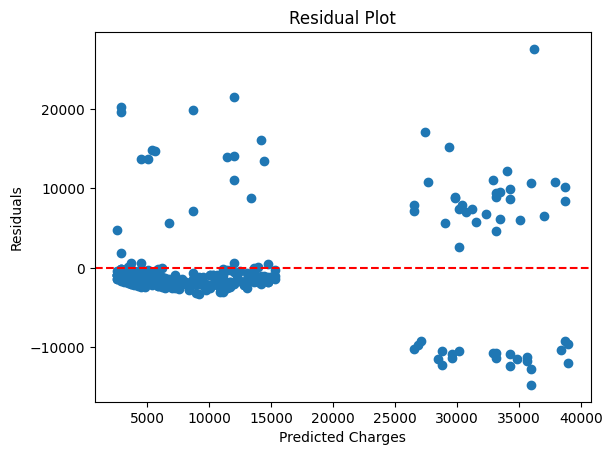

In [ ]:
#* Plot the residuals for the new model.
esiduals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
#* Calculate the R2 value for the new model.

r2 = model.score(X_test, y_test)

print("R2 Score:", r2)

R2 Score: 0.7534620778716639


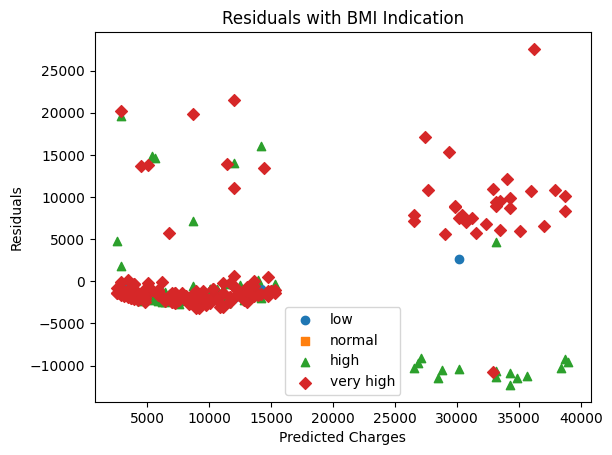

In [ ]:
# Plot of the residuals so they change the shape of each data point to indicate the BMI. Are there any obvious patterns in the residuals?
y_pred = model.predict(X_test)
residuals = y_test - y_pred
bmi_levels = df.loc[test_indices, 'bmi_level']
bmi_shapes = {'low': 'o', 'normal': 's', 'high': '^', 'very high': 'D'}
for bmi_level, shape in bmi_shapes.items():
    mask = bmi_levels == bmi_level
    plt.scatter(y_pred[mask], residuals[mask], marker=shape, label=bmi_level)

plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals with BMI Indication')
plt.legend()


plt.show()



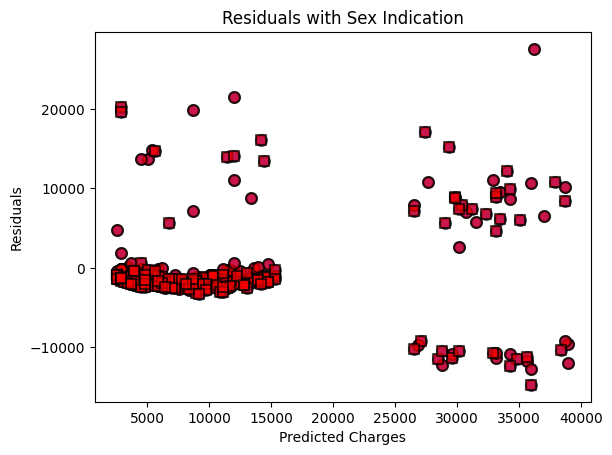

In [ ]:
# Plot of the residuals so they change the shape of each data point to examine the sex of the person. Are there any obvious patterns in the residuals?

y_pred = model.predict(X_test)

residuals = y_test - y_pred

sex_shapes = {'female': 'o', 'male': 's'}

sex_values = df['sex'].iloc[test_indices]


plt.scatter(y_pred, residuals, c='blue', edgecolors='black', s=60, alpha=0.7, linewidths=1.5, marker='o')  # Set default marker shape

for sex, shape in sex_shapes.items():
    mask = sex_values == sex
    plt.scatter(y_pred[mask], residuals[mask], c='red', edgecolors='black', s=60, alpha=0.7, linewidths=1.5, marker=shape)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals with Sex Indication')

plt.show()

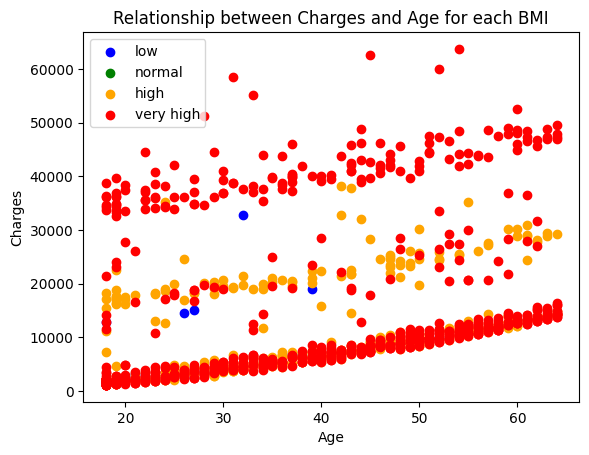

In [ ]:
#* Plot the trends in the relationship between the charges and age columns for each BMI.

bmi_colors = {'low': 'blue', 'normal': 'green', 'high': 'orange', 'very high': 'red'}


for bmi_level, color in bmi_colors.items():
    mask = df['bmi_level'] == bmi_level
    plt.scatter(df['age'][mask], df['charges'][mask], c=color, label=bmi_level)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Charges and Age for each BMI')
plt.legend()
plt.show()

In [ ]:
 #How would you improve this model further?

1. To design new features or change old ones, think about feature engineering.
2. Utilize regularization strategies to avoid overfitting.
3. To find the features that are most informative, perform feature selection.